https://www.kaggle.com/ilkeryildiz/example-dataset-for-ab-test?select=control_group.csv

In [2]:
import pandas as pd
import numpy as np

Note: in this case 1 day= 1 buyer=1 conversion. The user either converted or didn't at all

In [9]:
control=pd.read_csv('ab_control.csv')
control.head()

,Unnamed: 0,group,date,marketing_cost,clicks,add_cart,purchases,buyers,revenue
0,0,Control Campaign,1.08.2019,2280,7016.0,1819.0,618.0,314.0,9175.0
1,1,Control Campaign,2.08.2019,1757,8110.0,1219.0,511.0,249.0,8828.0
2,2,Control Campaign,3.08.2019,2343,6508.0,1134.0,372.0,284.0,6793.0
3,3,Control Campaign,4.08.2019,1940,3065.0,1183.0,340.0,199.0,6647.0
4,4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN


In [8]:
test=pd.read_csv('ab_test.csv')
test.head()

,Unnamed: 0,group,date,marketing_cost,clicks,add_cart,purchases,buyers,revenue
0,0,Test Campaign,1.08.2019,3008,3038,894,255,90.0,4796.0
1,1,Test Campaign,2.08.2019,2542,4657,879,677,307.0,12685.0
2,2,Test Campaign,3.08.2019,2365,7885,1268,578,219.0,10809.0
3,3,Test Campaign,4.08.2019,2710,4216,566,340,123.0,6270.0
4,4,Test Campaign,5.08.2019,2297,5863,956,768,272.0,15585.0


In [10]:
control['date']=pd.to_datetime(control['date'],dayfirst=True)

In [11]:
test['date']=pd.to_datetime(test['date'],dayfirst=True)

## 1.Graph cumulative revenue by group. Make conclusions and conjectures

In [14]:
control['cumul_rev']=control['revenue'].cumsum()
control.head()

,Unnamed: 0,group,date,marketing_cost,clicks,add_cart,purchases,buyers,revenue,cumul_rev
0,0,Control Campaign,2019-08-01,2280,7016.0,1819.0,618.0,314.0,9175.0,9175.0
1,1,Control Campaign,2019-08-02,1757,8110.0,1219.0,511.0,249.0,8828.0,18003.0
2,2,Control Campaign,2019-08-03,2343,6508.0,1134.0,372.0,284.0,6793.0,24796.0
3,3,Control Campaign,2019-08-04,1940,3065.0,1183.0,340.0,199.0,6647.0,31443.0
4,4,Control Campaign,2019-08-05,1835,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
test['cumul_rev']=test['revenue'].cumsum()
test.head()

,Unnamed: 0,group,date,marketing_cost,clicks,add_cart,purchases,buyers,revenue,cumul_rev
0,0,Test Campaign,2019-08-01,3008,3038,894,255,90.0,4796.0,4796.0
1,1,Test Campaign,2019-08-02,2542,4657,879,677,307.0,12685.0,17481.0
2,2,Test Campaign,2019-08-03,2365,7885,1268,578,219.0,10809.0,28290.0
3,3,Test Campaign,2019-08-04,2710,4216,566,340,123.0,6270.0,34560.0
4,4,Test Campaign,2019-08-05,2297,5863,956,768,272.0,15585.0,50145.0


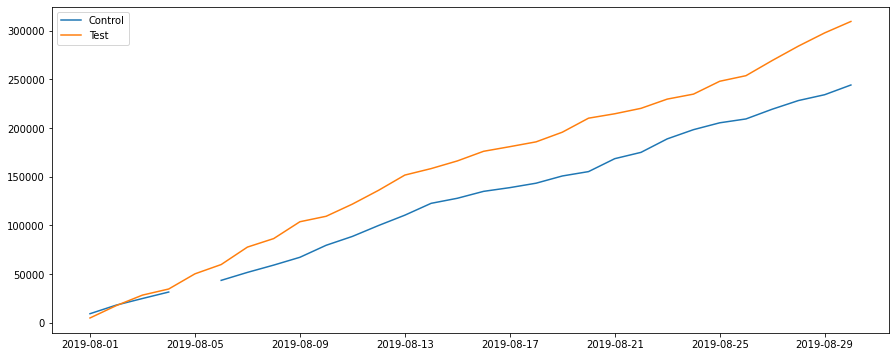

In [18]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(control['date'], control['cumul_rev'], label='Control')
plt.plot(test['date'], test['cumul_rev'], label='Test')
plt.legend()

## Plotting the cumulative average check by group and the relative change

In [19]:
control['cumul_purch']=control['purchases'].cumsum()
control['cumul_avch']=control['cumul_rev']/control['cumul_purch']
control.head()

,Unnamed: 0,group,date,marketing_cost,clicks,add_cart,purchases,buyers,revenue,cumul_rev,cumul_purch,cumul_avch
0,0,Control Campaign,2019-08-01,2280,7016.0,1819.0,618.0,314.0,9175.0,9175.0,618.0,14.846278
1,1,Control Campaign,2019-08-02,1757,8110.0,1219.0,511.0,249.0,8828.0,18003.0,1129.0,15.945970
2,2,Control Campaign,2019-08-03,2343,6508.0,1134.0,372.0,284.0,6793.0,24796.0,1501.0,16.519654
3,3,Control Campaign,2019-08-04,1940,3065.0,1183.0,340.0,199.0,6647.0,31443.0,1841.0,17.079305
4,4,Control Campaign,2019-08-05,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
test['cumul_purch']=test['purchases'].cumsum()
test['cumul_avch']=test['cumul_rev']/test['cumul_purch']
test.head()

,Unnamed: 0,group,date,marketing_cost,clicks,add_cart,purchases,buyers,revenue,cumul_rev,cumul_purch,cumul_avch
0,0,Test Campaign,2019-08-01,3008,3038,894,255,90.0,4796.0,4796.0,255,18.807843
1,1,Test Campaign,2019-08-02,2542,4657,879,677,307.0,12685.0,17481.0,932,18.756438
2,2,Test Campaign,2019-08-03,2365,7885,1268,578,219.0,10809.0,28290.0,1510,18.735099
3,3,Test Campaign,2019-08-04,2710,4216,566,340,123.0,6270.0,34560.0,1850,18.681081
4,4,Test Campaign,2019-08-05,2297,5863,956,768,272.0,15585.0,50145.0,2618,19.153934


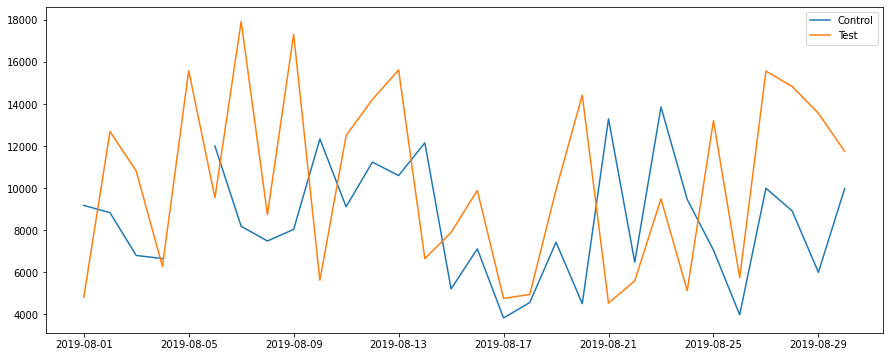

In [53]:

plt.plot(control['date'], control['revenue'], label='Control')
plt.plot(test['date'], test['revenue'], label='Test')
plt.legend()

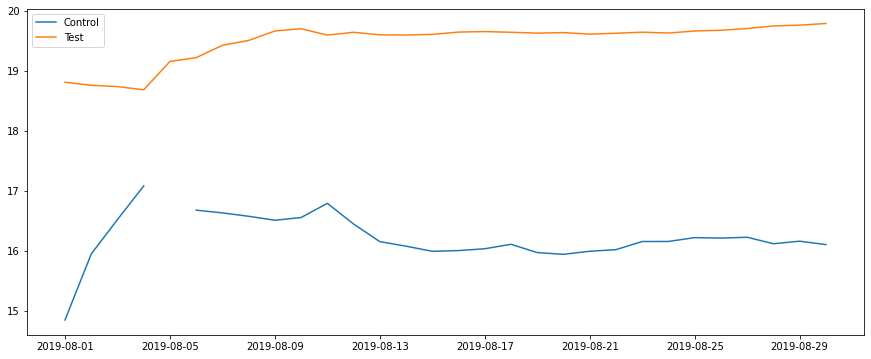

In [21]:

plt.plot(control['date'], control['cumul_avch'], label='Control')
plt.plot(test['date'], test['cumul_avch'], label='Test')
plt.legend()

## Calculate each group's conversion rate as the ratio of buyers to the number of clicks for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

In [22]:
control['conversion']=control['buyers']/control['clicks']
test['conversion']=test['buyers']/test['clicks']

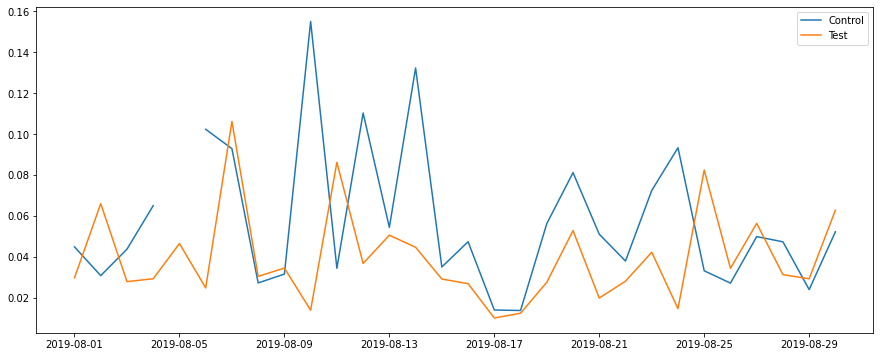

In [23]:
plt.plot(control['date'], control['conversion'], label='Control')
plt.plot(test['date'], test['conversion'], label='Test')
plt.legend()

In [24]:
#overall conversion control:
control['buyers'].sum()/control['clicks'].sum()

0.04894914551240093

In [25]:
#overall conversion test:
test['buyers'].sum()/test['clicks'].sum()

0.03622147317234901

## Is there any anomaly in the data? Find a day from which marketing campaign starts to have normal data

In [26]:
control_new=control[control['date']>'2019-08-05']
control_new

,Unnamed: 0,group,date,marketing_cost,clicks,add_cart,purchases,buyers,revenue,cumul_rev,cumul_purch,cumul_avch,conversion
5,5,Control Campaign,2019-08-06,3083,4028.0,784.0,764.0,412.0,11997.0,43440.0,2605.0,16.675624,0.102284
6,6,Control Campaign,2019-08-07,2544,2640.0,1166.0,499.0,245.0,8181.0,51621.0,3104.0,16.630477,0.092803
7,7,Control Campaign,2019-08-08,1900,7260.0,930.0,462.0,197.0,7481.0,59102.0,3566.0,16.573752,0.027135
8,8,Control Campaign,2019-08-09,2813,6198.0,645.0,501.0,195.0,8035.0,67137.0,4067.0,16.507745,0.031462
9,9,Control Campaign,2019-08-10,2149,2277.0,1629.0,734.0,353.0,12337.0,79474.0,4801.0,16.553635,0.155029
10,10,Control Campaign,2019-08-11,2490,8137.0,1887.0,475.0,279.0,9109.0,88583.0,5276.0,16.789803,0.034288
11,11,Control Campaign,2019-08-12,2319,2993.0,1439.0,794.0,330.0,11234.0,99817.0,6070.0,16.444316,0.110257
12,12,Control Campaign,2019-08-13,2697,6554.0,1794.0,766.0,356.0,10594.0,110411.0,6836.0,16.151404,0.054318
13,13,Control Campaign,2019-08-14,1875,4521.0,1339.0,788.0,598.0,12151.0,122562.0,7624.0,16.075813,0.132272
14,14,Control Campaign,2019-08-15,2774,4896.0,1641.0,366.0,171.0,5201.0,127763.0,7990.0,15.990363,0.034926


In [27]:
test_new=test[test['date']>'2019-08-05']
test_new

,Unnamed: 0,group,date,marketing_cost,clicks,add_cart,purchases,buyers,revenue,cumul_rev,cumul_purch,cumul_avch,conversion
5,5,Test Campaign,2019-08-06,2458,7488,882,488,185.0,9543.0,59688.0,3106,19.216999,0.024706
6,6,Test Campaign,2019-08-07,2838,4221,1301,890,448.0,17925.0,77613.0,3996,19.422673,0.106136
7,7,Test Campaign,2019-08-08,2916,7184,1240,431,218.0,8731.0,86344.0,4427,19.503953,0.030345
8,8,Test Campaign,2019-08-09,2652,8259,1200,845,284.0,17311.0,103655.0,5272,19.661419,0.034387
9,9,Test Campaign,2019-08-10,2790,8125,424,275,112.0,5615.0,109270.0,5547,19.698936,0.013785
10,10,Test Campaign,2019-08-11,2420,3750,1075,668,323.0,12497.0,121767.0,6215,19.592438,0.086133
11,11,Test Campaign,2019-08-12,2831,8264,1382,709,303.0,14216.0,135983.0,6924,19.639370,0.036665
12,12,Test Campaign,2019-08-13,1972,7568,1391,812,382.0,15618.0,151601.0,7736,19.596820,0.050476
13,13,Test Campaign,2019-08-14,2537,3993,779,340,178.0,6643.0,158244.0,8076,19.594354,0.044578
14,14,Test Campaign,2019-08-15,2516,4993,1090,398,145.0,7885.0,166129.0,8474,19.604555,0.029041


## Find the statistical significance of the difference in conversion between the groups using the raw and clean data. Make conclusions and conjectures.

In [28]:
import math
from scipy import stats

## There are 2 types of finding conversion:

### Total conversion check

In [29]:
control_trials=control['clicks'].sum()
print("Trials:",control_trials)
control_successes=control['buyers'].sum()
print("Successes:",control_successes)

Trials: 154303.0
Successes: 7553.0


In [30]:
test_trials=test['clicks'].sum()
print("Trials:",test_trials)
test_successes=test['buyers'].sum()
print("Successes:",test_successes)

Trials: 180970
Successes: 6555.0


In [31]:
def check_hypothesis(successes1,trials1, successes2,trials2, alpha=0.05):
    #proportion for success in the first group
    p1 = successes1/trials1

   #proportion for success in the second group
    p2 = successes2/trials2
    p_combined = (successes1 + successes2) / (trials1 + trials2)

  
    difference = p1 - p2
    
    
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

  
    distr = stats.norm(0, 1) 


    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

     

In [32]:
check_hypothesis(control_successes,control_trials, test_successes,test_trials, alpha=0.05)

p-value:  0.0


In [33]:

from statsmodels.stats.proportion import proportions_ztest
stat, pval = proportions_ztest([control_successes,test_successes], [control_trials,test_trials])
print('{0:0.3f}'.format(pval))


0.000


In [37]:
#clean data check: 
control_new_trials=control_new['clicks'].sum()

control_new_successes=control_new['buyers'].sum()

test_new_trials=test_new['clicks'].sum()

test_new_successes=test_new['buyers'].sum()

In [38]:
stat, pval = proportions_ztest([control_new_successes,test_new_successes], [control_new_trials,test_new_trials])
print('{0:0.3f}'.format(pval))

0.000


### Average daily conversion

/Users/anastasiapiterskaa/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/anastasiapiterskaa/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


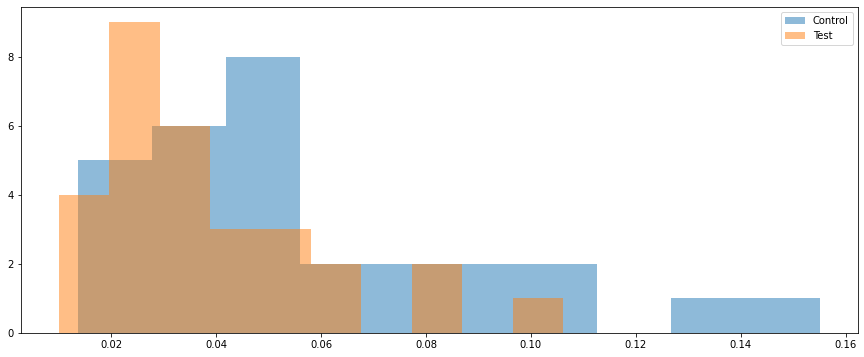

In [34]:
import random
import numpy
from matplotlib import pyplot


pyplot.hist(control['conversion'], alpha=0.5, label='Control')
pyplot.hist(test['conversion'], alpha=0.5, label='Test')
pyplot.legend(loc='upper right')
pyplot.show()

In [35]:
def testing_average(sample1,sample2,alpha=0.05):
    #checking normality
    sample1=sample1.dropna()
    sample2=sample2.dropna()
    stat1, p1_norm=stats.shapiro(sample1)
    stat2, p2_norm=stats.shapiro(sample2)
    if p1_norm > alpha and p2_norm>alpha:
        #then both normal, perform t-test.
        #for t-test also should check the equality of variances
        statslev,p_levene=stats.levene(sample1, sample2)
        if p_levene<alpha:
           #variances are not equal
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=False)
        else:
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=True) 
    else:
        statist,p_value=stats.mannwhitneyu(sample1, sample2)
    print(p_value)
    if p_value<alpha:
        print('Reject H0')
    else:
        print('Fail to Reject H0')
    

In [36]:
testing_average(control['conversion'],test['conversion'],alpha=0.05)

0.013167786108716755
Reject H0


In [44]:
testing_average(control_new['conversion'],test_new['conversion'],alpha=0.05)

0.02180102601802005
Reject H0


## Testing average check

In [46]:
control['avg_ch']=control['revenue']/control['purchases']
test['avg_ch']=test['revenue']/test['purchases']
control_new['avg_ch']=control_new['revenue']/control_new['purchases']
test_new['avg_ch']=test_new['revenue']/test_new['purchases']

/Users/anastasiapiterskaa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/anastasiapiterskaa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [51]:
control['avg_ch'].mean()

16.332787554918294

In [52]:
test['avg_ch'].mean()

19.71261414138068

In [49]:
testing_average(control['avg_ch'],test['avg_ch'],alpha=0.05)

2.1998184209355513e-10
Reject H0


In [50]:
testing_average(control_new['avg_ch'],test_new['avg_ch'],alpha=0.05)

1.2871075944527589e-09
Reject H0


Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.

**Q from students:** Just one question for sure though and thats how do we explain users who entered two groups. Is it because of the channel they use to visit? would love an explanation on that and if its simply a case of group A accidentally clicking through group B's channel would classifying them to their groups based on their first visit be the best course of action?